In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_utils
import esmlab

In [2]:
data_catalog.set_catalog('experiments')
experiment = 'esm-piControl'

active catalog: experiments


In [3]:
ds = xr.Dataset()
for varname in ['DIC_RIV_FLUX', 'DOC_RIV_FLUX', 'DOCr_RIV_FLUX', 'ALK_RIV_FLUX', 'pocToSed', 'calcToSed']:
    ds = xr.merge((ds, tseries_utils.get_tseries(varname, 'ocn', 'pop.h', experiment)))
ds['time']

<xarray.DataArray 'time' (time: 600)>
array([  396.,   424.,   455., ..., 18554., 18584., 18615.])
Coordinates:
  * time     (time) float64 396.0 424.0 455.0 ... 1.855e+04 1.858e+04 1.862e+04
Attributes:
    long_name:  time
    units:      days since 0000-01-01 00:00:00
    bounds:     time_bound
    calendar:   noleap

In [4]:
ds['Ctot_RIV_FLUX'] = ds.DIC_RIV_FLUX + ds.DOC_RIV_FLUX + ds.DOCr_RIV_FLUX
ds.Ctot_RIV_FLUX.attrs['units'] = ds.DIC_RIV_FLUX.attrs['units']
ds.Ctot_RIV_FLUX.name = 'Ctot_RIV_FLUX'

ds['CtotToSed'] = ds.pocToSed + ds.calcToSed
ds.CtotToSed.attrs['units'] = ds.pocToSed.attrs['units']
ds.CtotToSed.name = 'CtotToSed'

ds['AlkToSed'] = 2*ds.calcToSed
ds.AlkToSed.attrs['units'] = ds.calcToSed.attrs['units']
ds.AlkToSed.name = 'AlkToSed'

ds_ann = esmlab.climatology.compute_ann_mean(ds)
ds_ann

<xarray.Dataset>
Dimensions:        (time: 50)
Coordinates:
  * time           (time) object 0001-07-02 00:00:00 ... 0050-07-02 00:00:00
Data variables:
    DIC_RIV_FLUX   (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    DOC_RIV_FLUX   (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    DOCr_RIV_FLUX  (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    ALK_RIV_FLUX   (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    pocToSed       (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    calcToSed      (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    Ctot_RIV_FLUX  (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    CtotToSed      (time) float64 dask.array<shape=(50,), chunksize=(1,)>
    AlkToSed       (time) float64 dask.array<shape=(50,), chunksize=(1,)>

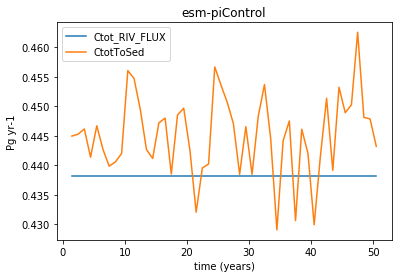

In [5]:
tseries_utils.tseries_plot_1ds(ds_ann, ['Ctot_RIV_FLUX', 'CtotToSed'], title=experiment)

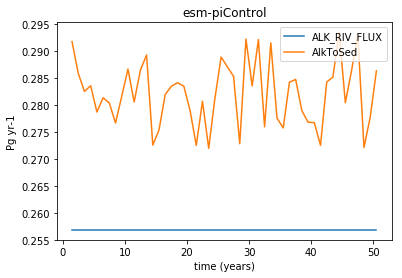

In [6]:
tseries_utils.tseries_plot_1ds(ds_ann, ['ALK_RIV_FLUX', 'AlkToSed'], title=experiment)